<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/credit_card_customer_segmentation_porfolio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

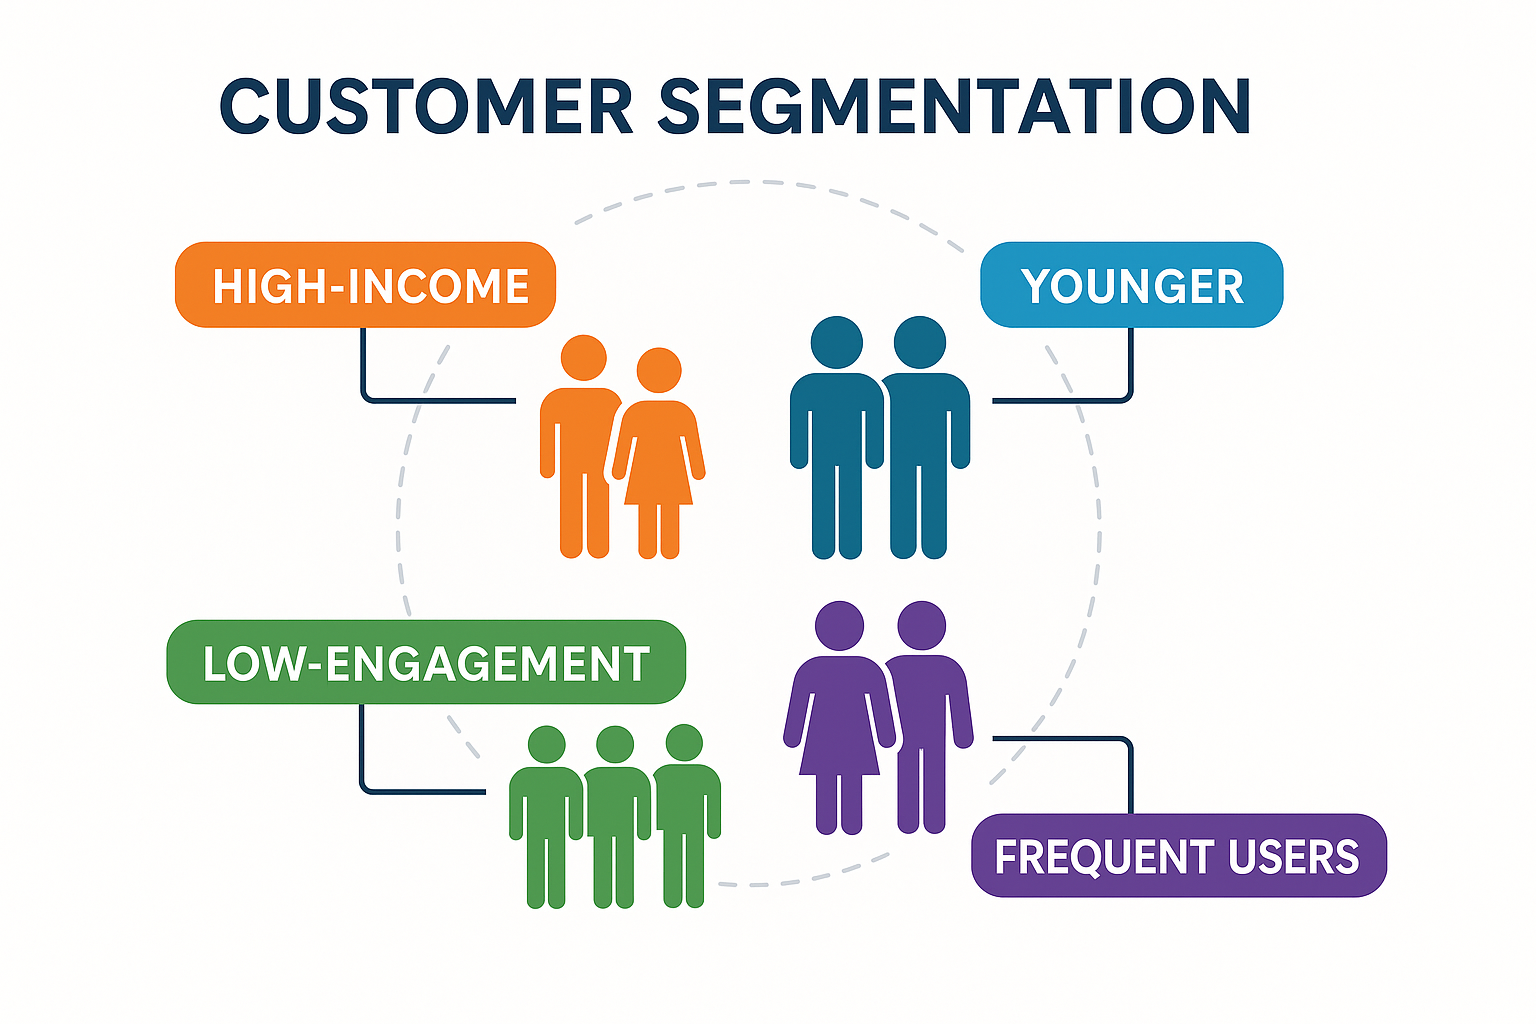# TITLE:Credict Card Customer Segmentation

## Introduction

In today’s competitive financial landscape, understanding customer behavior is essential for driving business strategies and improving customer satisfaction. This project focuses on segmenting credit card customers for a financial institution using unsupervised machine learning techniques. By grouping customers with similar attributes, the company can personalize marketing strategies, adjust credit limits, and design targeted incentives to better serve its diverse customer base.

The main objective of this project is to apply the K-Means clustering algorithm to identify distinct customer segments based on demographic and transactional attributes. These segments will inform strategic decisions such as increasing credit limits for customers with high usage but low spending, or incentivizing high-income customers with low engagement to use their cards more frequently.


The insights generated from this analysis will help the company:

* Identify customer groups with distinct behaviors.

* Understand the key differentiators between these groups.

* Create tailored financial products and services for each segment.



## Data Source

The dataset used in this project was provided by the company’s Data Engineering team and has been pre-cleaned for analysis. It contains detailed information on customer demographics, credit behavior, and card usage patterns.

### Data Dictionary

| **Variable**                 | **Description**                                                                 |
|-----------------------------|---------------------------------------------------------------------------------|
| `customer_id`               | Unique identifier for each customer.                                           |
| `age`                       | Age of the customer (in years).                                                |
| `gender`                    | Gender of the customer (Male or Female).                                       |
| `dependent_count`           | Number of dependents for each customer.                                        |
| `education_level`           | Highest level of education attained (e.g., High School, Graduate).             |
| `marital_status`            | Marital status (e.g., Single, Married).                                        |
| `estimated_income`          | Projected income of the customer, estimated by the company.                    |
| `months_on_book`            | Total number of months the customer has had a relationship with the company.   |
| `total_relationship_count`  | Number of times the customer has engaged with the company.                     |
| `months_inactive_12_mon`    | Number of inactive months in the past 12 months.                               |
| `credit_limit`              | Credit limit assigned to the customer.                                         |
| `total_trans_amount`        | Total transaction amount charged to the card.                                  |
| `total_trans_count`         | Total number of card transactions.                                             |
| `avg_utilization_ratio`     | Average daily credit utilization ratio.                                        |


## Data Preparation
Import Project Dependables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from scipy.stats.mstats import trimmed_var
import plotly.express as px

load and inspect the shape and head of the dataframe.

In [ ]:
df = pd.read_csv('/content/customer_segmentation.csv')
print(df.shape)
df.head()

(10127, 14)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

summary statistics

In [ ]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


<ipython-input-5-b6918f600cbf>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('customer_id', axis=1).hist(ax=ax)


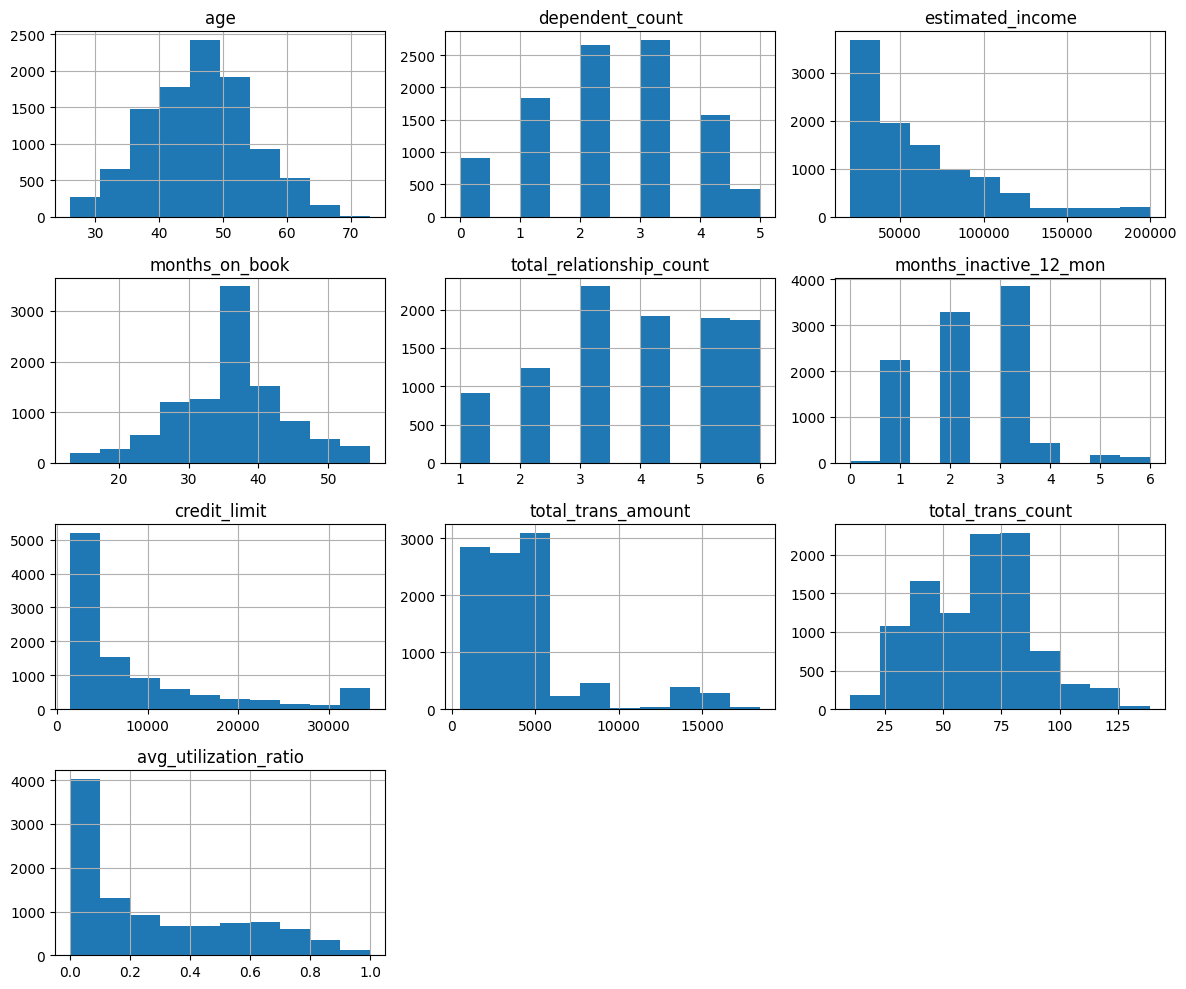

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
df.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

We analyzed data for 10,127 credit card customers, and here's what we learned about key attributes:
* Age: Customers are aged between 26 and 73, with an average age of 46 years.
* This suggests the company mostly serves middle-aged adults.
Estimated Income: The average estimated income is around $62,078, but there's a wide spread—from $20,000 to $200,000, indicating diverse income levels across the customer base.

* Months Inactive in Last Year: On average, customers were inactive for 2–3 months, which may indicate opportunities to improve engagement or target dormant users.
* Credit Limit: The average credit limit is about $8,632, but it ranges widely from $1,438 to $35,000, suggesting segmentation potential based on credit access.
* Utilization Ratio: The average credit utilization is 27%, though this varies greatly—from 0% to over 100%. This is crucial for identifying under- or over-utilized credit.



## Feature Engineering

In [ ]:
customers = df.copy()#to preserve our orignal data for reference

customers['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


Mapping out the educational levels instead of onehot encoding allows us to retain the rank of the data which is important for a KMeans model that relies on distance.it also prevents 'cause of dimentionality in our dataset.

In [ ]:
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2,
                     'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
customers['education_level'] = customers['education_level'].map(education_mapping)

customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


We used the onehot encoding's get dummies method here because the data is norminal,thus mapping would impose a false rank.

In [ ]:
dummies = pd.get_dummies(customers['marital_status'], drop_first=True)

customers = pd.concat([customers, dummies], axis=1)
customers.drop(['marital_status'], axis=1, inplace=True)
print(customers.info())
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  Married                   10127 non-null  bool   
 14  Single

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Married,Single,Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


## Feature Selection

In [ ]:
# drop customer id column
X=customers.drop('customer_id', axis=1)

"High variance features were selected for clustering because they capture the most meaningful variation in the data, which enhances the ability of the K-Means algorithm to form well-separated and interpretable clusters. This approach also helps reduce noise from low-information features and improves model performance and efficiency."

In [ ]:
# Calculate variance, get 10 largest features
top_ten_var =X.var().sort_values().tail(10)
top_ten_var

,0
months_inactive_12_mon,1.021358e+00
dependent_count,1.687163e+00
education_level,1.997981e+00
total_relationship_count,2.416184e+00
months_on_book,6.378285e+01
age,6.426931e+01
total_trans_count,5.509616e+02
total_trans_amount,1.154049e+07
credit_limit,8.260586e+07
estimated_income,1.550222e+09


Calculating the trimmed variance for the features.Our calculations should not include the top and bottom 10% of observations. Then we create a Series top_ten_trim_var with the 10 features with the largest variance.

In [ ]:
# Calculate trimmed variance
#we eliminated the button and top 10% because of outliers.outliers can inflate
#variance.
top_ten_trim_var = X.apply(trimmed_var,limits=(0.1,0.1)).sort_values().tail(10)
top_ten_trim_var

,0
months_inactive_12_mon,5.129186e-01
dependent_count,9.026865e-01
education_level,1.176657e+00
total_relationship_count,1.487786e+00
months_on_book,2.266454e+01
age,2.918063e+01
total_trans_count,2.673070e+02
total_trans_amount,2.155800e+06
credit_limit,2.684336e+07
estimated_income,6.218993e+08


In [ ]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
x=top_ten_trim_var,
y=top_ten_trim_var.index,
title="High Variance Features"
)
fig.update_layout(xaxis_title="Trimmed Variance [$]",yaxis_title="Feature")



fig.show()

In [ ]:
# Apply log10 transformation to variance values
log_top_ten_trim_var = np.log10(top_ten_trim_var)

# Create horizontal bar chart using log-scaled values
fig = px.bar(
    x=log_top_ten_trim_var,
    y=log_top_ten_trim_var.index,
    orientation='h',
    title='Log-Scaled Feature Variance',
    labels={'x': 'Log₁₀(Trimmed Variance)', 'y': 'Feature'}
)

fig.update_layout(
    xaxis_title="Log₁₀(Trimmed Variance)",
    yaxis_title="Feature",
    yaxis=dict(autorange="reversed")  # Optional: keep original order
)

fig.show()


The adoption of the log₁₀ transformation in visualizing feature variances is crucial when the data spans several orders of magnitude. In this case, features such as estimated_income and credit_limit have extremely high variances compared to others like months_inactive_12_mon or dependent_count. Plotting raw values directly results in smaller variance features being visually insignificant.

By applying a log₁₀ scale, we compress the range of variance values, allowing all features—regardless of their original scale—to be displayed meaningfully in the same chart. This transformation preserves the relative differences between features while ensuring fair visual comparison, which is essential for effective feature analysis and selection.

From the plot above, we generate a list high_var_cols with the columng names of the five features with the highest trimmed variance.

In [ ]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
high_var_cols

['age',
 'total_trans_count',
 'total_trans_amount',
 'credit_limit',
 'estimated_income']

Split the dataset

In [ ]:
X_train = X[high_var_cols]#selecting the high var columns from the dataframe
print("X shape:", X_train.shape)
X_train.head()

X shape: (10127, 5)


,age,total_trans_count,total_trans_amount,credit_limit,estimated_income
0,45,42,1144,12691.0,69000
1,49,33,1291,8256.0,24000
2,51,20,1887,3418.0,93000
3,40,20,1171,3313.0,37000
4,40,28,816,4716.0,65000


## Build Model

### Hyperparameter tunning

Using a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive). our model should include a StandardScaler. Each time a model is trained, we calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.

* Inertia:Measures how tightly data points in a cluster are grouped around the centroid.
* Silhouette Score:Measures how similar a point is to its own cluster compared to other clusters.



In [ ]:
n_clusters = range(2,13)
inertia_errors =[]
silhouette_scores =[]

# Add `for` loop to train model and calculate inertia, silhouette score.

for k in n_clusters:
    # build model
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))#PIPELINE
    # fit the model
    model.fit(X_train)
    # calculate inertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # calculate silhouette_scores
    silhouette_scores.append(silhouette_score(X_train,model.named_steps['kmeans'].labels_))


print("Inertia:", inertia_errors[:11])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [38446.262597437366, 31504.7083138009, 24523.417561469196, 20833.965896936716, 18712.155531671477, 17048.362066194964, 16063.137887943414, 14894.060076360056, 14190.32109490985, 13507.957431789939, 12862.039260253645]

Silhouette Scores: [np.float64(0.36837371009043746), np.float64(0.06068683934169673), np.float64(0.0035929059979678962)]


In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig =px.line(
x=n_clusters,y=inertia_errors,title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Inertia")



fig.show()

In [ ]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig =px.line(
x=n_clusters,y=silhouette_scores,title="K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Silhouette Score")

fig.show()

From the plots above,we will go with 4 clusters as it gives us a better trade off between inertial and siloughet score.

### Build Model Pipeline

In [ ]:
final_model = make_pipeline(
StandardScaler(),#for data scaling
KMeans(n_clusters=4,random_state=42)
)

# Fit model to data
final_model.fit(X_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

### Make predictions

In [ ]:
y = final_model.fit_predict(X_train)

y

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['CLUSTER'] = y + 1#adding a new column to the original df
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,1
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1


In [ ]:
df['CLUSTER'].value_counts()

,count
CLUSTER,
1,3799
3,3641
2,1774
4,913


## Communication

In [ ]:
# for the high varaiance features
labels = final_model.named_steps['kmeans'].labels_#centroids
xgb = X_train.groupby(labels).mean()
xgb

,age,total_trans_count,total_trans_amount,credit_limit,estimated_income
0,39.760990,61.787312,3527.090550,4845.681364,47734.403790
1,46.775085,58.368095,3481.457723,21885.163585,119089.064262
2,53.258995,60.518814,3470.388904,4709.201977,48061.246910
3,45.121577,107.557503,13569.521358,14278.824754,66887.185104


Cluster 0: Represents younger customers (~40 years old) with moderate transaction counts and low credit limits and incomes.

Cluster 1: Includes middle-aged customers (~47) with similar transaction counts but higher credit limits and significantly higher incomes, suggesting a higher-value segment.

Cluster 2: Slightly older group (~53) with similar transaction behavior to Cluster 0 but also lower financial metrics, possibly retirees or low-income seniors.

Cluster 3: Stands out with a much higher transaction count and total amount spent, moderate credit limit, and decent income — this is likely your high-activity customer segment.

In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
xgb,
barmode='group',
title="Credit Card Customers by Cluster")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")

fig.show()

the determinant factors in selecting a cluster for each customer were estimated income followed by credit limit and total transaction amount. it can also be seen that cluster two(1) has the highest estimated income.

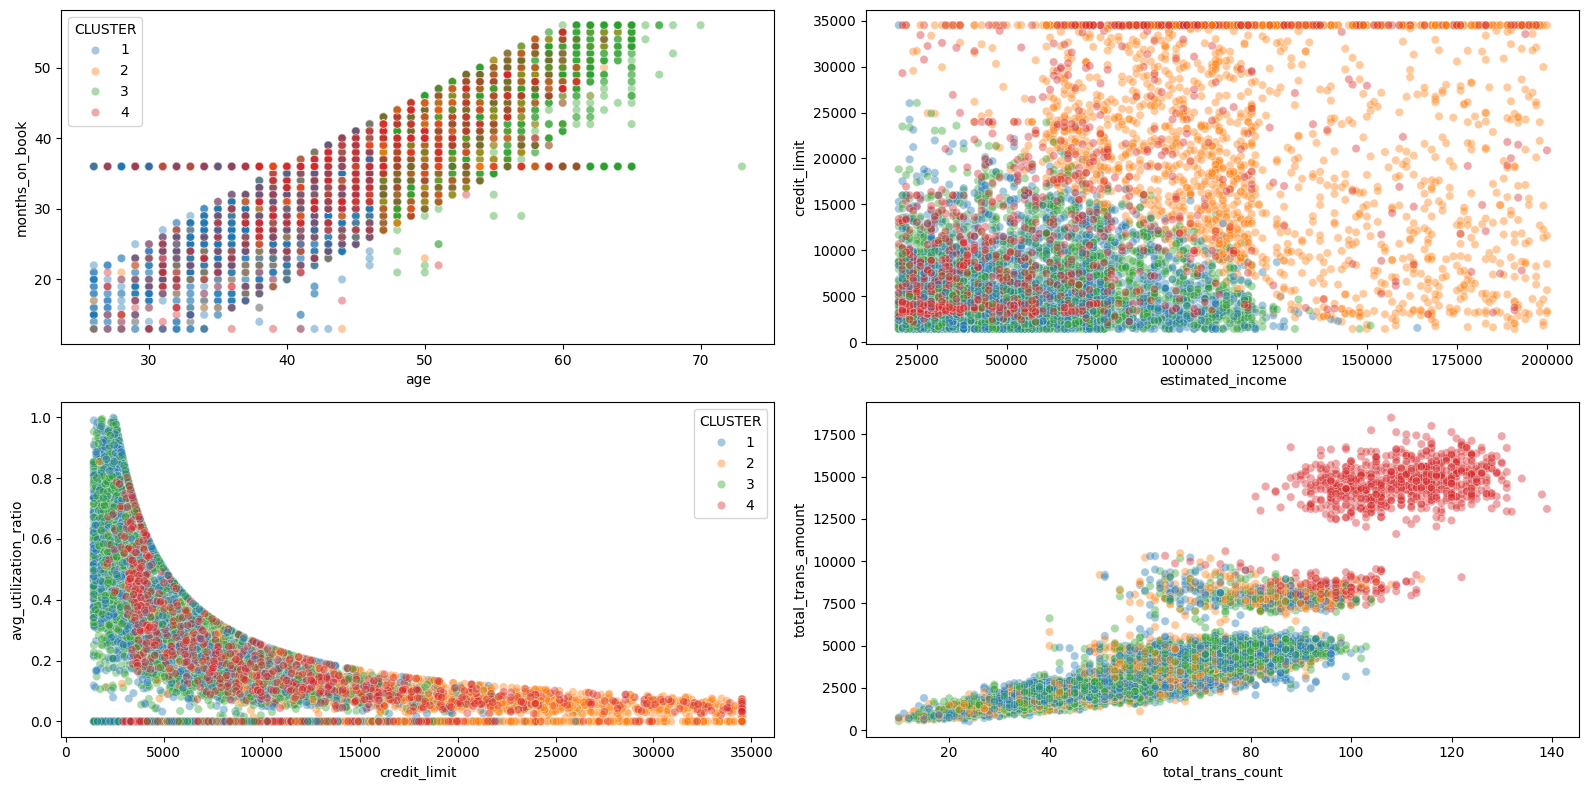

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

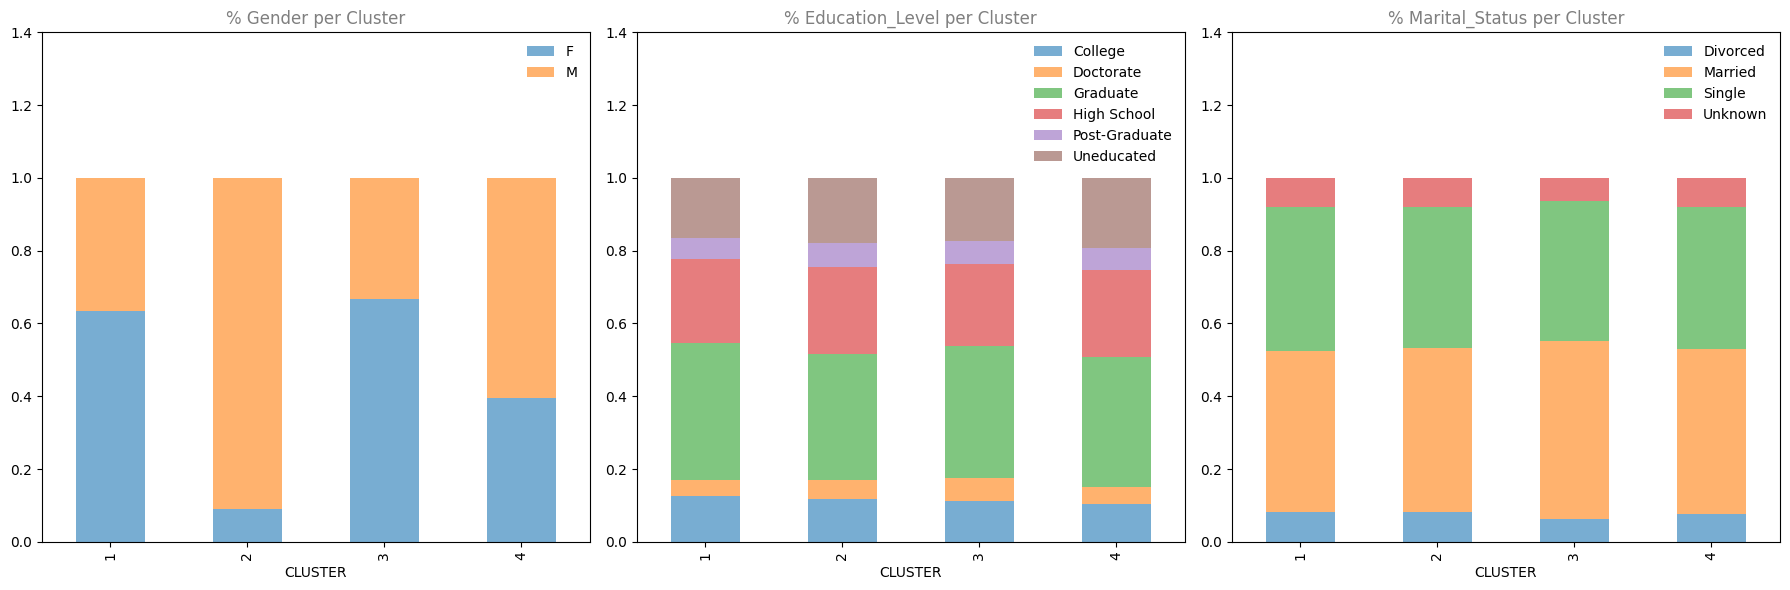

In [ ]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    # ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

### 📊 Final Insights from Customer Clusters (KMeans = 4)

| Cluster | Age  | Total Transactions | Transaction Amount | Credit Limit | Estimated Income | Key Insight |
|---------|------|---------------------|---------------------|---------------|------------------|-------------|
| **0**   | 39.8 | 61.8                | \$3,527             | \$4,846       | \$47,734         | **Young, moderate spenders** with low credit limits and average income. Likely cautious or emerging customers. |
| **1**   | 46.8 | 58.4                | \$3,481             | **\$21,885**  | **\$119,089**    | **High-income, low-spending** group with large credit limits. May underutilize services — opportunity for upselling or tailored investment offers. |
| **2**   | 53.3 | 60.5                | \$3,470             | \$4,709       | \$48,061         | **Older, low spenders** with low income and credit — may need retention or support strategies. |
| **3**   | 45.1 | **107.6**           | **\$13,570**        | \$14,279      | \$66,887         | **High-value customers** — frequent, high spenders with decent credit and income. Prioritize with loyalty rewards or premium offers. |


## 🧠 Strategic Recommendations
1.Cluster 0 (Emerging Spenders, 60% female)

* Offer financial literacy and starter credit programs especialy to women.

* Promote gradual credit increases and rewards for healthy usage.



2.Cluster 1 (High-Income, Under-Utilizing)
* Develop exclusive investment products, travel perks, or concierge services.

* Encourage engagement with spending-linked rewards.

3.Cluster 2 (At-Risk, Older Segment)
* Use retention strategies like fixed interest rates or service bundles.

* Could benefit from targeted outreach to increase interaction.

4.Cluster 3 (Loyal High Spenders)
* Retain through tiered loyalty programs, cashback, or VIP treatment.

* Gather feedback to enhance experience and retain high-LTV clients.

Since all clusters predominantly consist of graduates, it indicates that the customer base is relatively well-educated. This suggests a higher likelihood of financial literacy, enabling the company to introduce more sophisticated products such as investment tools or premium credit services. Communication strategies should emphasize data-driven value, transparency, and logic-based benefits to appeal to this audience’s preferences.